In [29]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "target"]

all_columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "target"]
adult_census = pd.read_csv(
    "../data/adult/adult-census.csv", 
    names=all_columns)

In [10]:

adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
target_column = "target"
adult_census[target_column].value_counts()

target
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [12]:
print(adult_census.shape)

(32561, 15)


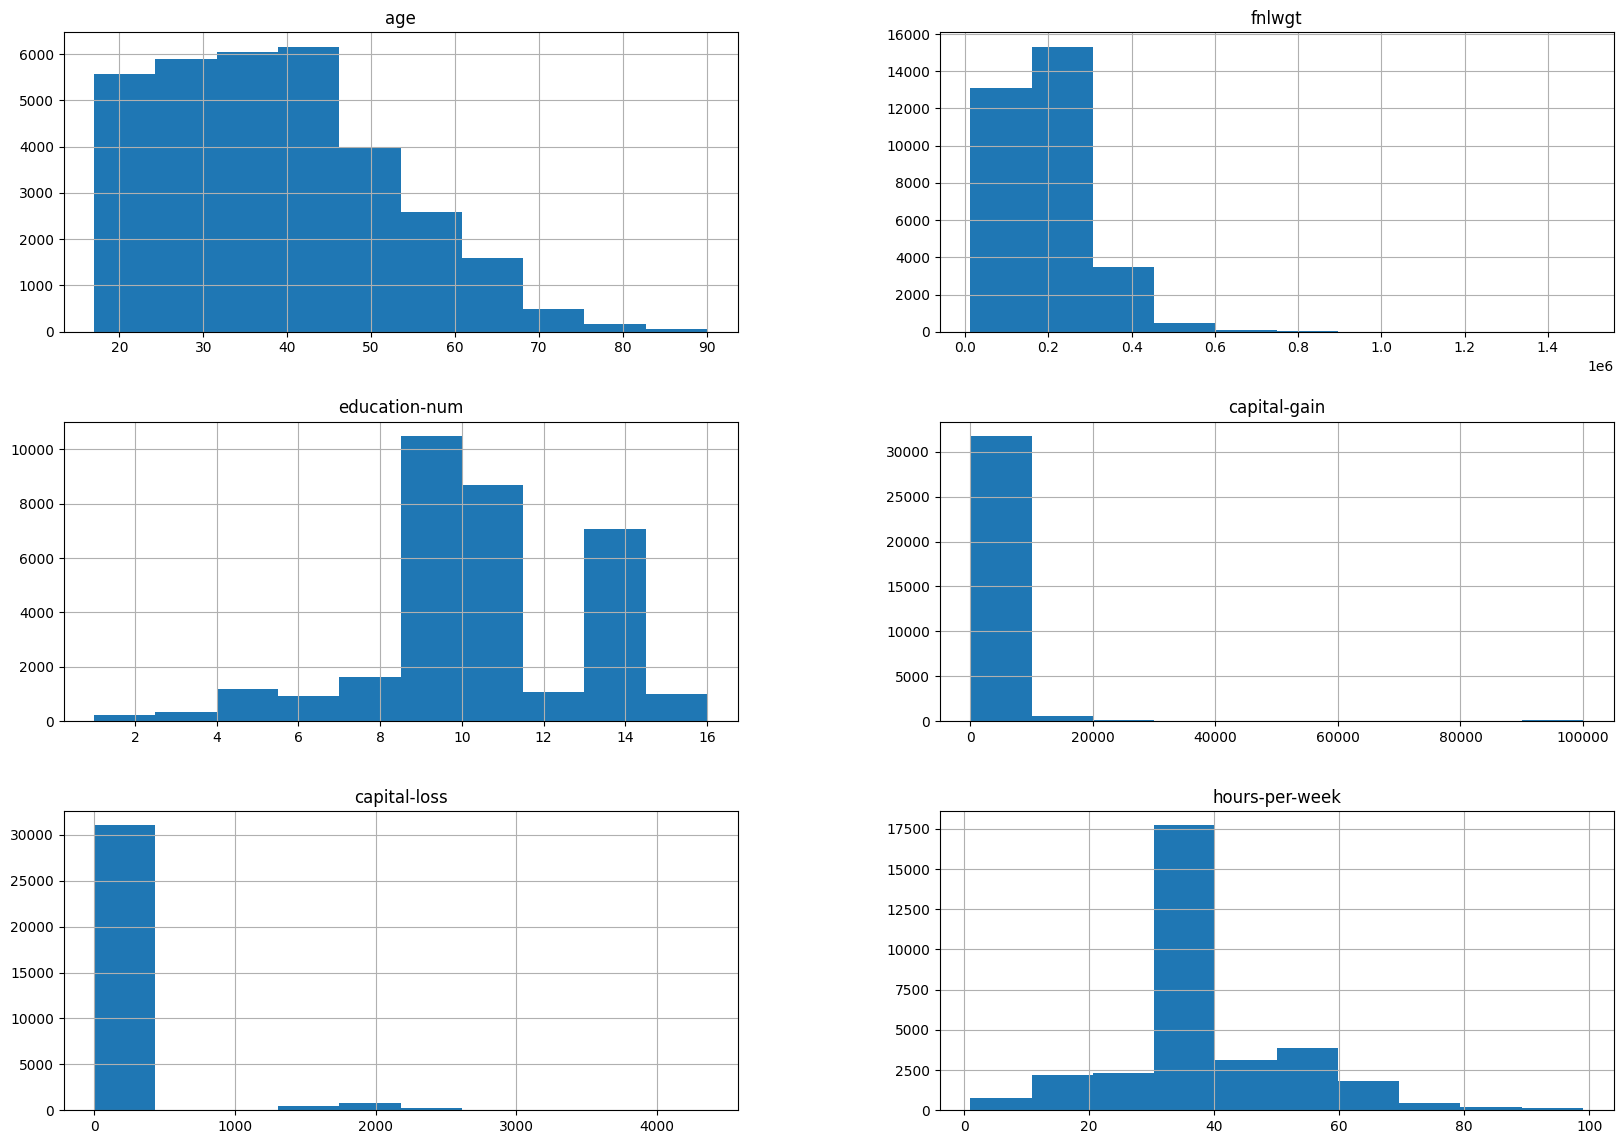

In [14]:
_ = adult_census.hist(figsize=(20, 14))

In [18]:
for column in categorical_columns:
    print(adult_census[column].value_counts())
    print("===========================================")

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [19]:
pd.crosstab(
    index=adult_census["education"],
    columns=adult_census["education-num"]
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


#### On Constate que chaque valeur de "education-num" est liée à un seul niveau scolaire. Les deux colonnes nous transmettent la même information, elles sont fortement correlées, l'une d'entre elles peut être supprimée.

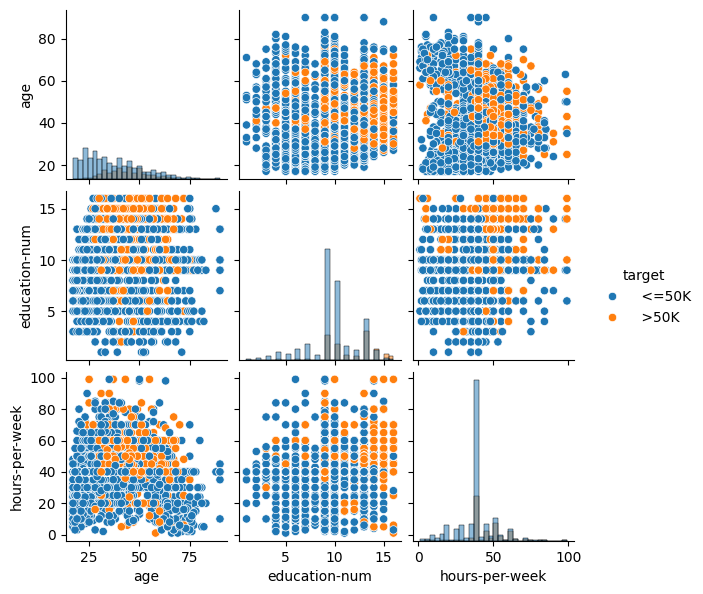

In [26]:
import seaborn as sns

n_samples_to_plot = 5000

columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 1},
    height=2,
    diag_kind="hist",
    diag_kws={"bins": 30}
)

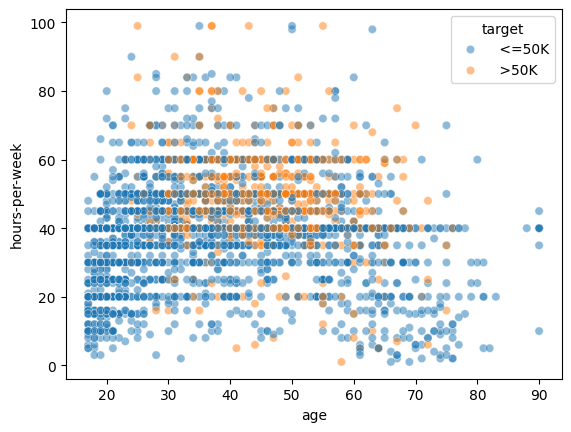

In [27]:
_ = sns.scatterplot(
    data=adult_census[:n_samples_to_plot],
    x="age",
    y="hours-per-week",
    hue=target_column,
    alpha=0.5,
)

### On constate à première vue qu'il est possible de prédire les revenus inferieurs à 50K sans avoir recours à un modèle d'apprentissage.

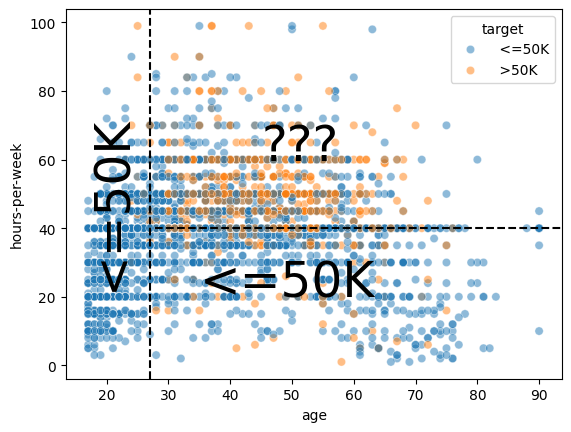

In [33]:
ax = sns.scatterplot(
    data=adult_census[:n_samples_to_plot],
    x="age",
    y="hours-per-week",
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit,
    xmin=0.18,
    xmax=1,
    color="black",
    linestyle="--"
)

plt.annotate("<=50K", xy=(17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", xy=(35, 20), fontsize=35)
_ = plt.annotate("???", xy=(45, 60), fontsize=35)

### La précedente figure nous apporte les infos suivantes:
* les personnes agées de moins de 27 ans ont un salaire inférieur à 50K
* Même constat pour tous les emploiyés travaillant moins de 40 heures par semaine
* La troisième région semble ambigu. En effet, il y a un mixte de bleu et orange. Il est compliqué de choisir entre les deux classes. 